# Angular Grids

This example illustrates how to perform surface integrals over the sphere using the [angular](../pyapi/grid.angular.rst#grid.angular.AngularGrid) grid module in Grid.

The angular grids supported currently are the Lebedev-Laikov grid and the symmetric spherical t-design grid.  Either grids
can be specified by the degree or the number of points in the grid. The degree is defined here to be the
maximum angular degree $l$ of the real spherical harmonics $Y_{lm}$ that the grid can integrate accurately.

#### Lebedev-Laikov Grids

This example shows basic properties of the Lebedev-Laikov grids and how they relate to the real spherical harmonics functions.

In [1]:
from grid.angular import AngularGrid

# The closest degree to a specified degree is found:
ang_grid = AngularGrid(degree=6)
print(f"Actual degree of the angular grid {ang_grid.degree}")

# Rather than degree, the number of points can be specified
ang_grid = AngularGrid(size=150)
print(f"Actual number of points of the angular grid {ang_grid.size}")

Actual degree of the angular grid 7
Actual number of points of the angular grid 170


The angular grid points are distributed across on the unit-sphere $S^2$, i.e. points are normalized to one.

Norm of the grid points is all one:  True


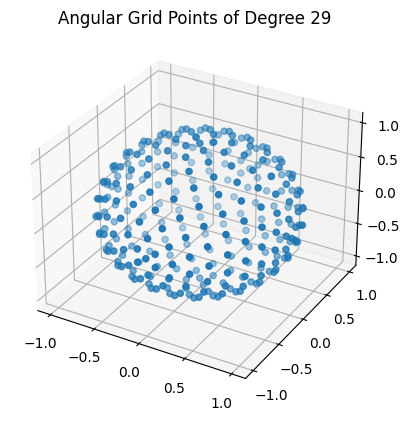

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

degree = 29
ang_grid = AngularGrid(degree=degree)
x, y, z = ang_grid.points.T

# Angular grid points are on the unit sphere.
norm = np.linalg.norm(ang_grid.points, axis=1)
print(f"Norm of the grid points is all one:  {np.all(np.abs(norm - 1.0) < 1e-8)}")

# Plot of the angular grid points
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z)
ax.set_title(f"Angular Grid Points of Degree {degree}")
plt.show()


#### Integral of Identity Function

The integral of the identity function over the unit-sphere $S^2$ is $4 \pi$:

$$
\int_{S^2} d\Sigma = \int_{0}^{2\pi} \int_0^{\pi} \sin(\phi) d\theta d\phi = 2 \pi \int_0^{\pi} \sin(\phi) d\phi = 4 \pi
$$


In [3]:
integrand = np.ones(ang_grid.size)
integral = ang_grid.integrate(integrand)

print(f"The integral {np.round(integral, 6)} should be close to 4 pi {np.round(4 * np.pi, 6)}.")


The integral 12.566371 should be close to 4 pi 12.566371.


#### Integral of Spherical Harmonic Function

The real spherical harmonic functions $Y_{lm}$ integrates to zero unless when $l=0, m=0$:

$$
\begin{align*}
    \int_{0}^{2\pi} \int_0^{\pi} Y_{00}(\theta, \phi) \sin(\phi) d\theta d\phi &= \sqrt{4 \pi}  \\
    \int_{0}^{2\pi} \int_0^{\pi} Y_{lm}(\theta, \phi) \sin(\phi) d\theta d\phi &= 0
\end{align*}
$$


In [4]:
from grid.utils import convert_cart_to_sph, generate_real_spherical_harmonics

# Convert from cartesian to spherical
_, theta, phi = convert_cart_to_sph(ang_grid.points).T
print(f"Minimum {np.min(theta)} and Maximum {np.max(theta)} of theta coordinate")
print(f"Minimum {np.min(phi)} and Maximum {np.max(phi)} of phi coordinate \n")

# Generate all spherical harmonics up to order l=2
sph_harmonics = generate_real_spherical_harmonics(2, theta, phi)

# Orders are:
orders = [[0, 0], [1, 0], [1, 1], [1, -1], [2, 0], [2, 1], [2, -1], [2, 2], [2, -2]]

# Integrate each one
for i, sph_harm in enumerate(sph_harmonics):
    print(f"Integral for Y_{orders[i]} is {ang_grid.integrate(sph_harm)}")


Minimum -3.044810534956229 and Maximum 3.141592653589793 of theta coordinate
Minimum 0.0 and Maximum 3.141592653589793 of phi coordinate 

Integral for Y_[0, 0] is 3.5449077018109114
Integral for Y_[1, 0] is 4.990845180164426e-17
Integral for Y_[1, 1] is 2.6715419156400633e-18
Integral for Y_[1, -1] is 1.3676193966367933e-17
Integral for Y_[2, 0] is 3.5989074676119615e-16
Integral for Y_[2, 1] is -1.4194154613613938e-18
Integral for Y_[2, -1] is 2.498747194400186e-20
Integral for Y_[2, 2] is 4.2650649993095785e-17
Integral for Y_[2, -2] is -2.3564456592614635e-17


#### Spherical Harmonics Are Orthonormal

The following showcases that the real spherical harmonics implemented in grid are orthonormal i.e.

$$ \int_{0}^{2\pi} \int_0^{\pi} Y_{l_1, m_1}(\theta, \phi)  Y_{l_2, m_2}(\theta, \phi)  \sin(\phi) d\theta d\phi = \delta_{l_1, l_2}\cdot \delta_{m_1, m_2}$$


In [5]:
# Integrate each one
for i, sph_harm in enumerate(sph_harmonics):
    l1, m1 = orders[i]
    for j, sph_harm2 in enumerate(sph_harmonics):
        l2, m2 = orders[j]
        print(f"Integral of ({l1}, {m1}) and ({l2}, {m2}) is {ang_grid.integrate(sph_harm * sph_harm2)}")
    print("")


Integral of (0, 0) and (0, 0) is 0.9999999999999659
Integral of (0, 0) and (1, 0) is 1.4099922198231897e-17
Integral of (0, 0) and (1, 1) is 7.703764655277862e-19
Integral of (0, 0) and (1, -1) is 3.86839947011039e-18
Integral of (0, 0) and (2, 0) is 1.0151520466253339e-16
Integral of (0, 0) and (2, 1) is -4.1160507280638657e-19
Integral of (0, 0) and (2, -1) is -1.7999450129153882e-21
Integral of (0, 0) and (2, 2) is 1.2027867851011065e-17
Integral of (0, 0) and (2, -2) is -6.656408415997919e-18

Integral of (1, 0) and (0, 0) is 1.4099922198231897e-17
Integral of (1, 0) and (1, 0) is 0.9999999999999661
Integral of (1, 0) and (1, 1) is -3.2176664083822734e-19
Integral of (1, 0) and (1, -1) is -6.352747104407253e-22
Integral of (1, 0) and (2, 0) is -1.0786594006369091e-17
Integral of (1, 0) and (2, 1) is 2.4420224567137496e-18
Integral of (1, 0) and (2, -1) is 5.400152676101385e-18
Integral of (1, 0) and (2, 2) is -2.8587361969832636e-21
Integral of (1, 0) and (2, -2) is 4.7645603283054